<a href="https://colab.research.google.com/github/ys910111/bioinfo1/blob/main/Guided_Mission_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
from google.colab import drive
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import ssl

Mount drive

In [40]:
drive.mount('/content/drive')

%cd /content/drive/MyDrive/binfo1-work

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/binfo1-work


Read cnts

In [41]:
cnts = pd.read_csv('read-counts.txt', sep='\t', comment='#', index_col=0)

Filtering counts

In [42]:
cnts = cnts[cnts["CLIP-35L33G.bam"] >= 30]
cnts = cnts[cnts["RNA-control.bam"] >= 30]
cnts = cnts[cnts["RNA-siLin28a.bam"] >= 30]
cnts = cnts[cnts["RNA-siLuc.bam"] >= 30]
cnts = cnts[cnts["RPF-siLuc.bam"] >= 80]

Calculate RPKM value

In [43]:
cnts['CLIP-35L33G.bam_fil'] = (cnts['CLIP-35L33G.bam'].astype(float) * 1000 * 1000000) / (cnts['Length'].astype(float) * sum(cnts['CLIP-35L33G.bam']))
cnts['RNA-control.bam_fil'] = (cnts['RNA-control.bam'].astype(float) * 1000 * 1000000) / (cnts['Length'].astype(float) * sum(cnts['RNA-control.bam']))
cnts['RPF-siLin28a.bam_fil'] = (cnts['RPF-siLin28a.bam'].astype(float) * 1000 * 1000000) / (cnts['Length'].astype(float) * sum(cnts['RPF-siLin28a.bam']))
cnts['RNA-siLin28a.bam_fil'] = (cnts['RNA-siLin28a.bam'].astype(float) * 1000 * 1000000) / (cnts['Length'].astype(float) * sum(cnts['RNA-siLin28a.bam']))
cnts['RPF-siLuc.bam_fil'] = (cnts['RPF-siLuc.bam'].astype(float) * 1000 * 1000000) / (cnts['Length'].astype(float) * sum(cnts['RPF-siLuc.bam']))
cnts['RNA-siLuc.bam_fil'] = (cnts['RNA-siLuc.bam'].astype(float) * 1000 * 1000000) / (cnts['Length'].astype(float) * sum(cnts['RNA-siLuc.bam']))

Calculate CLIP enrichment, Ribosome density

In [44]:
cnts['clip_enrichment'] = cnts['CLIP-35L33G.bam_fil'] / cnts['RNA-control.bam_fil']
cnts['rden_change'] = (cnts['RPF-siLin28a.bam_fil'] / cnts['RNA-siLin28a.bam_fil']) / (cnts['RPF-siLuc.bam_fil'] / cnts['RNA-siLuc.bam_fil'])

Draw 1st plot (with no label)

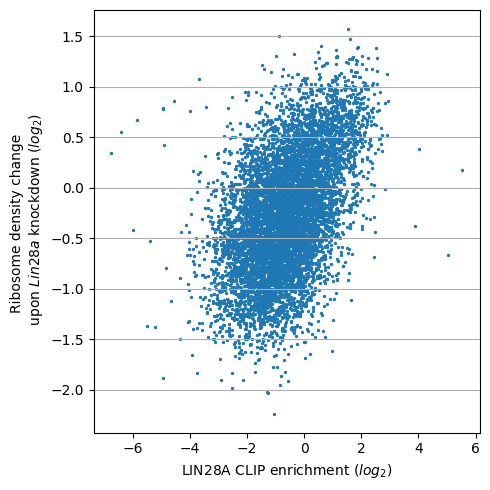

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(np.log2(cnts['clip_enrichment']),
           np.log2(cnts['rden_change']),
           s = 2)
plt.grid(True, axis = 'y')
plt.xlabel('LIN28A CLIP enrichment (' + r'$log_{2}$' + ')')
plt.ylabel('Ribosome density change \n upon ' + r'$\it{Lin28a}$' + ' knockdown (' + r'$log_{2}$' + ')')

plt.tight_layout()
plt.savefig('1st_plot.png')

Get localization data

In [47]:
ssl._create_default_https_context = ssl._create_unverified_context
mouselocal = pd.read_csv('https://hyeshik.qbio.io/binfo/mouselocalization-20210507.txt', sep='\t')

Create merged dataframe

In [48]:
mouselocal.index = mouselocal['gene_id']
cnts.index = [i.split('.')[0] for i in cnts.index]
merged = pd.merge(cnts, mouselocal, left_index = True, right_index = True)

Draw 2nd plot (with label)

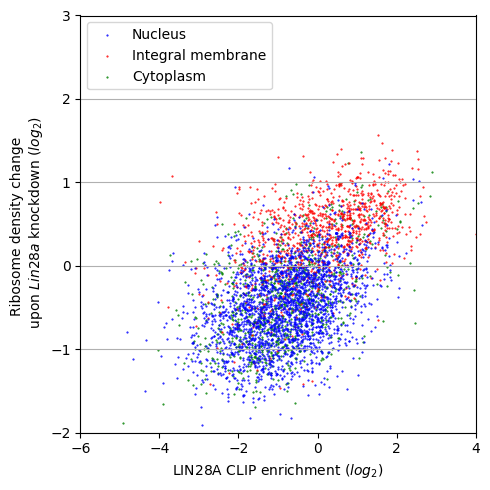

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

c = {'nucleus': 'b', 'integral membrane': 'r', 'cytoplasm': 'g'}
l = {'nucleus': 'Nucleus', 'integral membrane': 'Integral membrane', 'cytoplasm': 'Cytoplasm'}

groups = merged.groupby('type')
for name, group in groups:
    plt.scatter(np.log2(group['clip_enrichment']), 
                np.log2(group['rden_change']), 
                marker='.', s = 1,
                label=l[name], color = c[name])

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles = handles[::-1], loc = "upper left")
plt.grid(True, axis = 'y')

plt.xlim([-6,4])
plt.ylim([-2,3])

plt.xlabel('LIN28A CLIP enrichment (' + r'$log_{2}$' + ')')
plt.ylabel('Ribosome density change \n upon ' + r'$\it{Lin28a}$' + ' knockdown (' + r'$log_{2}$' + ')')

plt.tight_layout()
plt.savefig('2nd_plot.png')